<a href="https://colab.research.google.com/github/umurerwa-jacky/Homework1-AI_DS/blob/main/Machine_learning_homewrk9__Jackline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Data Exploration/ understanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
# reading the file with  encoding and loading the data
# Load the dataset
df = pd.read_csv("C:\\Users\\Test_user\\OneDrive\\Desktop\\netflix_titles.csv", encoding='ISO-8859-1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
8807                               Sci-fi, Horror, Action
8808                             Drama, Romance, Thriller
Name: listed_in, Length: 8809, dtype: object

In [ ]:
# Get basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


# 2.Investigate the Data:
# Missing Values:

In [ ]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# Data Cleaning

In [ ]:
df_type = df.dtypes
print(df_type)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# Convert the 'date_added' column to string type to handle non-string values
df['date_added'] = df['date_added'].astype(str)

# Strip leading and trailing whitespace from 'date_added' column
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Display the first few rows to confirm changes
print(df['date_added'].head())
print(df.info())



0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      6175 non-null   object        
 4   cast          7984 non-null   object        
 5   country       7978 non-null   object        
 6   date_added    8799 non-null   datetime64[ns]
 7   release_year  8809 non-null   int64         
 8   rating        8805 non-null   object        
 9   duration      8806 non-null   object        
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 826.0+ KB
None


# Descriptive Statistics:

In [ ]:
descriptive_stats = df.describe()
print(descriptive_stats)

                          date_added  release_year
count                           8799   8809.000000
mean   2019-05-17 15:43:18.431640064   2014.181292
min              2008-01-01 00:00:00   1925.000000
25%              2018-04-06 00:00:00   2013.000000
50%              2019-07-02 00:00:00   2017.000000
75%              2020-08-19 12:00:00   2019.000000
max              2024-04-05 00:00:00   2024.000000
std                              NaN      8.818932


In [ ]:
#Categorical Data Analysis:


In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

# Analyze distribution of categories
type_distribution = df['type'].value_counts()
print(type_distribution)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')
type
Movie      6132
TV Show    2677
Name: count, dtype: int64


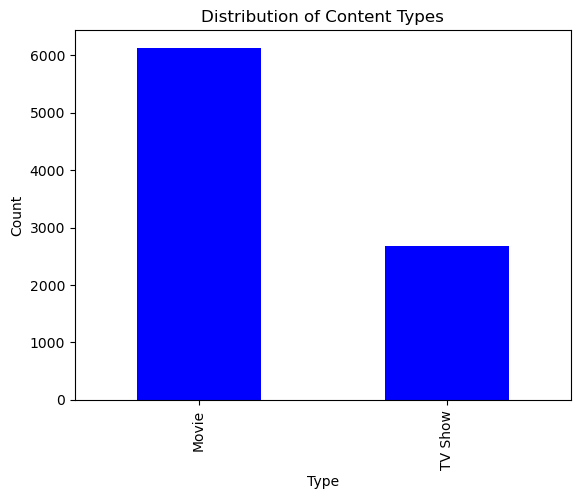

In [ ]:
# Bar chart for 'type' distribution
type_distribution.plot(kind='bar', color='blue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()

In [ ]:
# Data cleaning:

In [ ]:
# Handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
# Drop rows where 'rating' and 'duration' columns have NaNs
df.dropna(subset=['rating', 'duration'], inplace=True)
df.isnull().sum()
# Verify there are no more missing values
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8802 non-null   object        
 1   type          8802 non-null   object        
 2   title         8802 non-null   object        
 3   director      8802 non-null   object        
 4   cast          8802 non-null   object        
 5   country       8802 non-null   object        
 6   date_added    8802 non-null   datetime64[ns]
 7   release_year  8802 non-null   int64         
 8   rating        8802 non-null   object        
 9   duration      8802 non-null   object        
 10  listed_in     8802 non-null   object        
 11  description   8802 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.0+ KB


In [ ]:
df["rating"].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64


Average Rating by Type:
type
Movie      3.970622
TV Show    4.010841
Name: rating_num, dtype: float64


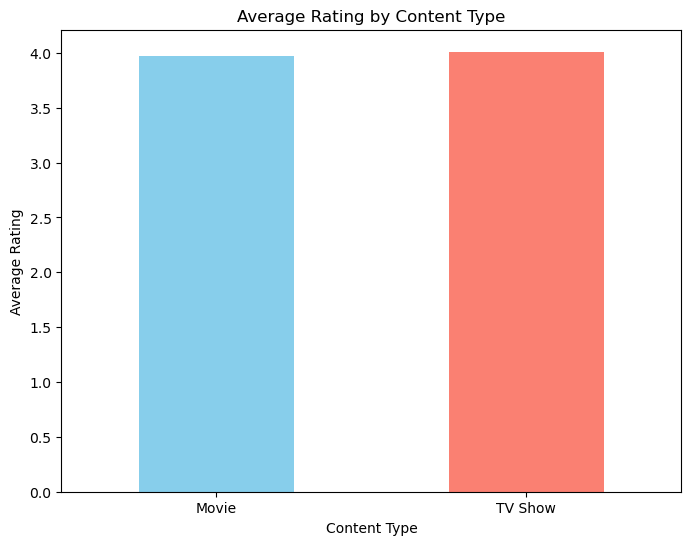

In [ ]:
rating_mapping = {
    'TV-G': 0,
    'NR': 0,
    'UR': 0,
    'TV-Y': 0,
    'G': 0,
    'PG': 1,
    'TV-PG': 1,
     'PG-13': 2,
    'TV-Y7': 3,
    'TV-Y7-FV': 3,
     'TV-14': 4,
    'R': 5,
    'TV-MA': 6,
    'A': 6,
    'NC-17': 6
}

df['rating_num'] = df['rating'].map(rating_mapping)

# Handle any unmapped ratings (shouldn't be necessary if all ratings are covered)
df['rating_num'].fillna(0, inplace=True)

# Calculate the average rating for each type
average_rating = df.groupby('type')['rating_num'].mean()
print("\nAverage Rating by Type:")
print(average_rating)

# Create a bar chart to compare average ratings
average_rating.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Print Random number from the title
print(df.title.sample(10))

8034                         Skydancers
1021                        Peepli Live
5776         Riphagen - The Untouchable
1466       The Minimalists: Less Is Now
1677                    My Amnesia Girl
3859                   All In My Family
1442         Korean Pork Belly Rhapsody
5080                     Pyar Ke Do Pal
1895                H2O: Just Add Water
938     Motu Patlu in the Game of Zones
Name: title, dtype: object


In [ ]:
 # Task 2 :Data Visualization
1. Release Year Distribution
Visualize the distribution of the "release_year" column

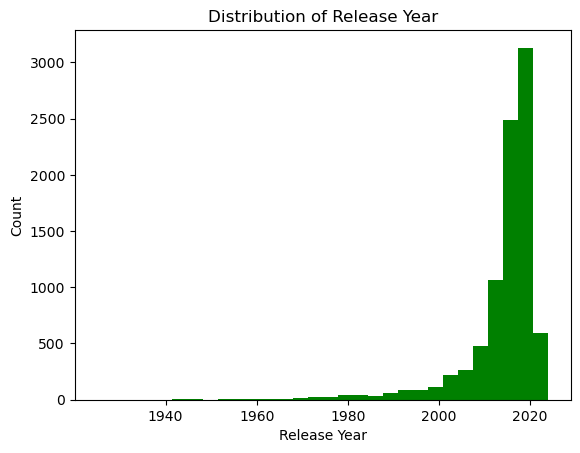

In [ ]:
# Histogram for release year distribution
df['release_year'].plot(kind='hist', bins=30, color="green")
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
#Rating by Type Calculate the average rating for "Movie" and "TV Show" categories.

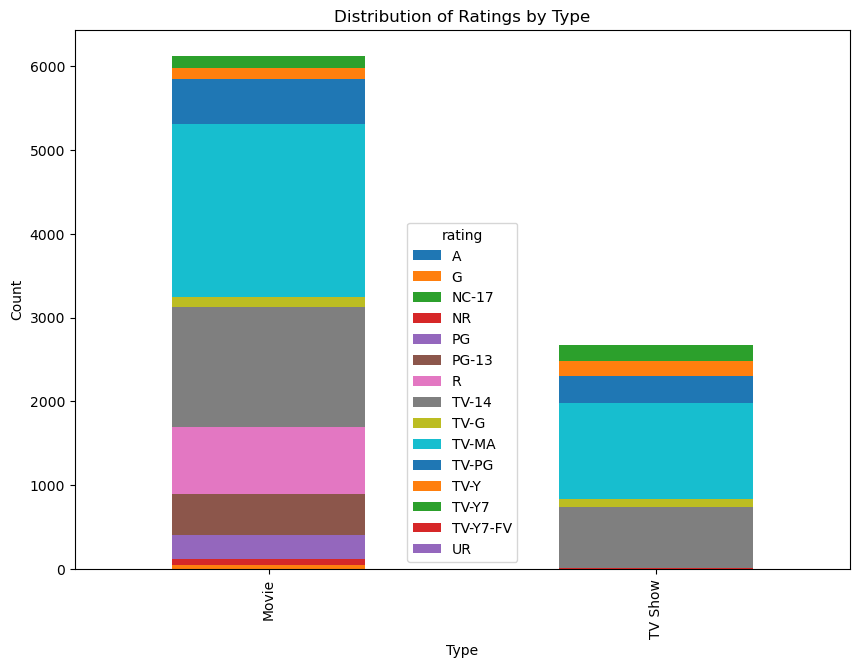

In [ ]:
# Rating by Type
rating_by_type = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plotting
rating_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Task 3: Building a Simple Recommendation Model
1. Identify Features
Choose features for the recommendation model.

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rating_num'],
      dtype='object')

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
rating_num      0
dtype: int64

In [ ]:
# Check if 'duration' column exists
if 'duration' in df.columns:
    # Extract numeric values from 'duration' and convert to float
    df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

    # Optionally, handle different formats (e.g., converting seasons to minutes if needed)
    # For simplicity, we'll assume 'duration_min' is correctly extracted as minutes.
    # You may need more sophisticated handling if 'duration' includes seasons.
else:
    print("The 'duration' column does not exist in the DataFrame.")

# Verify that the 'duration_min' column has been created and contains valid values
print(df[['duration', 'duration_min']].head())

# Ensure all necessary columns are present before selecting features
required_columns = ['type', 'title', 'release_year', 'duration_min', 'listed_in', 'rating_num']
for column in required_columns:
    if column not in df.columns:
        print(f"Column '{column}' is missing from the DataFrame.")
    else:
        print(f"Column '{column}' is present in the DataFrame.")

# Select features and target variable
features = ['type', 'title', 'release_year', 'duration_min', 'listed_in']
target = 'rating_num'

# Proceed only if all columns are available
if all(column in df.columns for column in features + [target]):
    X = df[features]
    y = df[target]

    # Preprocessing for categorical features using OneHotEncoder
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer

    # Define preprocessing for numeric and categorical features
    numeric_features = ['release_year', 'duration_min']
    categorical_features = ['type', 'title', 'listed_in']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Append classifier to preprocessing pipeline
    from sklearn.ensemble import RandomForestClassifier

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Split data into training and test sets
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    from sklearn.metrics import classification_report

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    print("Ensure all required columns are present in the DataFrame before proceeding.")


    duration  duration_min
0     90 min          90.0
1  2 Seasons           2.0
2   1 Season           1.0
3   1 Season           1.0
4  2 Seasons           2.0
Column 'type' is present in the DataFrame.
Column 'title' is present in the DataFrame.
Column 'release_year' is present in the DataFrame.
Column 'duration_min' is present in the DataFrame.
Column 'listed_in' is present in the DataFrame.
Column 'rating_num' is present in the DataFrame.
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       118
           1       0.55      0.29      0.38       235
           2       0.54      0.33      0.41        96
           3       0.53      0.36      0.43        69
           4       0.48      0.41      0.44       437
           5       0.53      0.45      0.49       152
           6       0.55      0.78      0.65       654

    accuracy                           0.53      1761
   macro avg       0.53      0.44      0.47      1761
weighted a